本节介绍了解非线性方程组解法与最优化方法

本文用到python的sympy库进行符号运算，
可以到第一章进行了解。

原创内容,如需转载需征得作者同意。

Copyright©2020 lizhemin
***

1.定义$f:\mathbb{R}^2\rightarrow \mathbb{R}^1$如下：$f\left(x_{1}, x_{2}\right)=\left\{\begin{array}{cc}x_{1}&\text{当}x_2=0 \\ x_{2}&\text{当}x_1=0 \\ 1&\text{其余}(x_1,x_2)\end{array}\right.$
证明$\frac{\partial f(0)}{\partial x_1}$及$\frac{\partial f(0)}{\partial x_2}$均存在，但$f$在点$(0,0)$处不可导

**证明：**偏导数的定义易得存在性

不妨反设可导，那么导数必为$(0,0)^T$，进而由导数定义导出矛盾(选取方向$h=k\cdot (1,1)$)
***

2.给出一个线性映射$B:\mathbb{R}^2\rightarrow \mathbb{R}^2$和$\mathbb{R}^2$上两种范数的例子，使得$B$对一种范数是压缩的，对另一种范数不是压缩的。

3.若$G(x)=\frac{1}{2}x+2$，证明$G$在$[0,1]$上是压缩的，但没有不动点。

**证明：**压缩很容易，关键是由于没有把区间映射到区间内，所以无法保证有不动点。证明的话就不妨假设有，得到点为4，即有不动点，但不在区间内。

4.证明由$G(x)=ln(1+e^x)$定义的函数$G:\mathbb{R}^1\rightarrow\mathbb{R}^1$，在任何闭区间$[a,b]$上是压缩的，但没有不动点。

证明：导数小于1，但仍然无法保证会映射进之前的区间

5.$G:\mathbb{R}^1\rightarrow\mathbb{R}^1$定义为$G(x)=x-x^3$，证明$x^*=0$是$x^{k+1}=G(x^k)(k=0,1,\ldots)$的一个吸引点；另一方面，若$G(x)=x+x^3$，证明$x=0$不是吸引点。

证：取邻域$(-1,1)$来证，不是吸引点则反证，会发现可以构造出发散的序列。
***

6.设$G:\mathbb{R}^2\rightarrow\mathbb{R}^2$定义为$G(x)=\left[\begin{array}{c}x_1^2-x_2\\x_2^2\end{array}\right]$，证明$x^*=0$是$x^{k+1}=G(x^k)(k=0,1,\ldots)$的一个吸引点。

解不等式找到邻域
***

7.用迭代法求$x^2-3=0$的根$\sqrt{3}$时，可构造不同的迭代函数$G$，研究下列三种迭代序列的收敛性及收敛阶：(1)$x_{k+1}=\frac{3}{x_k}$
(2)$x_{k+1}=x_k-\frac{1}{4}(x_k^2-3)$(3)$x_{k+1}=\frac{1}{2}\left(x_k+\frac{3}{x_k}\right)$

通过求导小于一，可以得到一定能收敛的区域。

带入收敛阶定义，不难得到(1)1阶 (2)1阶 (3)2阶
***

8.序列$\{x^k\}$定义为$x^{(2i-1)}=\frac{1}{i!},x^{(2i)}=2x^{(2i-1)},i=1,2,\ldots$证明$\lim_{k\rightarrow \infty}x^k=0$且$\lim_{k\rightarrow \infty}\frac{\|x^{k+1}-x^k\|}{\|x^k-x^*\|}=1$，但$\{x^k\}$不是超线性收敛的。

收敛到0显然，是线性收敛。

9.给定非线性方程组$\left\{\begin{array}{l}x_{1}=\frac{x_{1}^{2}+x_{2}^{2}+8}{10}=g_{1}\left(x_{1}, x_{2}\right) \\ x_{2}=-\frac{x_{1} x_{2}^{2}+x_{1}+8}{30}=g_{2}\left(x_{1}, x_{2}\right)\end{array}\right.$

(a)应用压缩映射定理证明$G=(g_1,g_2)$在$D=\{(x_1,x_2)|0\leq x_1,x_2\leq1.5\}$中有唯一不动点

(b)用不动点迭代法求方程组的解，使$\|x^k-x^{k-1}\|\leq \frac{1}{2}\times 10^{-5}$时停止迭代


In [10]:
import numpy as np
import copy

def g(x):
    x_return = copy.copy(x)
    x_return[0] = (x[0]**2+x[1]**2+8)/10
    x_return[1] = -(x[0]*x[1]**2+x[0]+8)/30
    return x_return

def ite(g,x,error):
    x_old = copy.copy(x)
    x_new = g(x_old)
    while np.sqrt(np.mean((x_new-x_old)**2))>error:
        x_old = copy.copy(x_new)
        x_new = g(x_old)
    return x_new

x0 = np.array([[0.0],[0.0]])
print(ite(g,x0,5e-6))


[[ 0.88774222]
 [-0.2989017 ]]


10.用牛顿法求下列非线性方程组的解，迭代到$\|x^k-x^{k-1}\|\leq\frac{1}{2}\times 10^{-5}$为止

(a)$\left\{\begin{array}{l}x_{1}^{2}+x_{2}^{2}-10 x_{1}+8=0 \\ x_{1} x_2^{2}+x_{1}-10 x_{2}+8=0\end{array}\right.$，取$x^0=(0.7,0.5)^T$

(b)$\left\{\begin{array}{l}3 x_{1}^{2}-x_{2}^{2}=0 \\ 3 x_{1} x_{2}^{3}-x_{1}^{3}-1=0\end{array}\right.$，取$x^0=(0.8,0.4)^T$

(c)$\left\{\begin{array}{l} x_{1}^{2}-x_{2}^{2}-4=0 \\  x_{1}^{2}-x_{2}^{2}-1=0\end{array}\right.$，取$x^0=(1.5,1.2)^T$

In [21]:
import numpy as np
import sympy as sp
import copy

def newton(g,x0,error):
    x_old = copy.copy(x0)
    x_new = n_1(g,x_old)
    while np.sqrt(np.mean((x_old-x_new)**2))>error:
        x_old = copy.copy(x_new)
        x_new = n_1(g,x_old)
    return x_new

def inverse(g,x):
    L = len(g)
    inver = np.zeros((L,L))
    value_dict = {}
    for i in range(L):
        value_dict['x'+str(i+1)] = x[i]
    for i in range(L):
        for j in range(L):
            diff_func = eval('sp.diff(g[i],x'+str(j+1)+')')
            inver[i,j] = diff_func.evalf(subs=value_dict)
    inver = np.matrix(inver)
    inver = np.linalg.pinv(inver)
    return np.array(inver)

def n_1(g,x):
    L = len(g)
    g_x = np.zeros((L,1))
    value_dict = {}
    for i in range(L):
        value_dict['x'+str(i+1)] = x[i]
    for i in range(L):
        g_x[i] = g[i].evalf(subs=value_dict)
    return x-np.dot(inverse(g,x),g_x)

x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')

f1 = x1**2+x2**2-10*x1+8
f2 = x1*x2**2+x1-10*x2+8

g1 = 3*x1**2-x2**2
g2 = 3*x1*x2**3-x1**3-1

h1 = x1**2-x2**2-4
h2 = x1**2-x2**2-1

f = (f1,f2)
g = (g1,g2)
h = (h1,h2)

print('result_1:',newton(f,np.array([[0.7],[0.5]]),5e-6))
print('result_2:',newton(g,np.array([[0.8],[0.4]]),5e-6))
print('result_3:',newton(h,np.array([[1.6],[1.2]]),5e-6))

result_1: [[1.]
 [1.]]
result_2: [[0.52010553]
 [0.9008492 ]]
result_3: [[1.86905432]
 [0.9966765 ]]


11.用简化牛顿法及修正牛顿法(取$m=3$)求上题各方程组的解

In [24]:
import numpy as np
import sympy as sp
import copy

def easy_newton(g,x0,error):
    x_old = copy.copy(x0)
    x_new = n_1(g,x0)
    while np.sqrt(np.mean((x_old-x_new)**2))>error:
        x_old = copy.copy(x_new)
        x_new = n_1(g,x0)
    return x_new

def modify_newton(g,x0,error,m=3):
    x_old = copy.copy(x0)
    x_new = copy.copy(x0)
    for i in range(m):
        x_new = x_new-np.dot(inverse(g,x_old),get_g(g,x_new))
    while np.sqrt(np.mean((x_old-x_new)**2))>error:
        x_old = copy.copy(x_new)
        for i in range(m):
            x_new = x_new-np.dot(inverse(g,x_old),get_g(g,x_new))
    return x_new

def get_g(g,x):
    L = len(g)
    g_x = np.zeros((L,1))
    value_dict = {}
    for i in range(L):
        value_dict['x'+str(i+1)] = x[i]
    for i in range(L):
        g_x[i] = g[i].evalf(subs=value_dict)
    return g_x
    
def inverse(g,x):
    L = len(g)
    inver = np.zeros((L,L))
    value_dict = {}
    for i in range(L):
        value_dict['x'+str(i+1)] = x[i]
    for i in range(L):
        for j in range(L):
            diff_func = eval('sp.diff(g[i],x'+str(j+1)+')')
            inver[i,j] = diff_func.evalf(subs=value_dict)
    inver = np.matrix(inver)
    inver = np.linalg.pinv(inver)
    return np.array(inver)

def n_1(g,x):
    L = len(g)
    g_x = np.zeros((L,1))
    value_dict = {}
    for i in range(L):
        value_dict['x'+str(i+1)] = x[i]
    for i in range(L):
        g_x[i] = g[i].evalf(subs=value_dict)
    return x-np.dot(inverse(g,x),g_x)

x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')

f1 = x1**2+x2**2-10*x1+8
f2 = x1*x2**2+x1-10*x2+8

g1 = 3*x1**2-x2**2
g2 = 3*x1*x2**3-x1**3-1

h1 = x1**2-x2**2-4
h2 = x1**2-x2**2-1

f = (f1,f2)
g = (g1,g2)
h = (h1,h2)
print('easy_newton:')
print('result_1:',easy_newton(f,np.array([[0.7],[0.5]]),5e-6))
print('result_2:',easy_newton(g,np.array([[0.8],[0.4]]),5e-6))
print('result_3:',easy_newton(h,np.array([[1.6],[1.2]]),5e-6))
print('modified_newton:')
print('result_1:',modify_newton(f,np.array([[0.7],[0.5]]),5e-6))
print('result_2:',modify_newton(g,np.array([[0.8],[0.4]]),5e-6))
print('result_3:',modify_newton(h,np.array([[1.6],[1.2]]),5e-6))

easy_newton:
result_1: [[0.95475676]
 [0.95090817]]
result_2: [[0.57314815]
 [1.23888889]]
result_3: [[1.876]
 [0.993]]
modified_newton:
result_1: [[1.]
 [1.]]
result_2: [[0.52010553]
 [0.9008492 ]]
result_3: [[1.86963704]
 [0.99776884]]


12.用牛顿下山法求下列方程组的解

$\left\{\begin{array}{l}x_{1}^{2}+10 x_{1} x_{2}+4 x_{2}^{2}+0.741006=0 \\ x_{1}^{2}-3 x_{1} x_{2}+2 x_{2}^{2}-1.0201228=0\end{array}\right.$
取$x^0=(0.1,-0.1)^T$

$\|x^k-x^{k-1}\|\leq \frac{1}{2}\times 10^{-6}$，打印$x^k,\|F(x^k)\|_\infty$及迭代次数$k$

In [29]:
import numpy as np
import sympy as sp
import copy

def get_g(g,x):
    L = len(g)
    g_x = np.zeros((L,1))
    value_dict = {}
    for i in range(L):
        value_dict['x'+str(i+1)] = x[i]
    for i in range(L):
        g_x[i] = g[i].evalf(subs=value_dict)
    return g_x
    
def inverse(g,x):
    L = len(g)
    inver = np.zeros((L,L))
    value_dict = {}
    for i in range(L):
        value_dict['x'+str(i+1)] = x[i]
    for i in range(L):
        for j in range(L):
            diff_func = eval('sp.diff(g[i],x'+str(j+1)+')')
            inver[i,j] = diff_func.evalf(subs=value_dict)
    inver = np.matrix(inver)
    inver = np.linalg.pinv(inver)
    return np.array(inver)

def nm(g,x0,error):
    x_old = copy.copy(x0)
    i = 0
    x_new = x_old-2**(-i)*np.dot(inverse(g,x_old),get_g(g,x_old))
    while np.sqrt(np.mean((get_g(g,x_new)**2))) >= np.sqrt(np.mean((get_g(g,x_old)**2))):
        i += 1
        x_new = x_old-2**(-i)*np.dot(inverse(g,x_old),get_g(g,x_old))
    
    while np.sqrt(np.mean((x_old-x_new)**2))>error:
        x_old = x_new
        i = 0
        x_new = x_old-2**(-i)*np.dot(inverse(g,x_old),get_g(g,x_old))
        while np.sqrt(np.mean((get_g(g,x_new)**2))) >= np.sqrt(np.mean((get_g(g,x_old)**2))):
            i += 1
            x_new = x_old-2**(-i)*np.dot(inverse(g,x_old),get_g(g,x_old))
        print(np.sqrt(np.mean((x_old-x_new)**2)))
    return x_new


x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')

f1 = x1**2+10*x1*x2+4*x2**2+0.741006
f2 = x1**2-3*x1*x2+2*x2**2-1.0201228

f = (f1,f2)

nm(f,np.array([[0.1],[-0.1]]),5e-7)



0.08142872933987833
0.009908445320844818
0.0003061387986007236
3.651505011617902e-07


array([[ 0.37681071],
       [-0.43776377]])

13.写出一步$N-SOR$迭代法与一步$SOR-N$迭代法，说明它们是不同的。

N-SOR:
$$\left\{\begin{array}{l}
x^{k+0}=x^{k} \\
x^{k+1+1}=B_{s}^{-1} C_{k} x^{m+1}+B_{k}^{-1} b_{k}, i=0,1, \cdots, m k-1 \\
x^{k+1}=x^{k, m}=1, k=0,1, \ldots
\end{array}\right.$$
SOR-N:
$$\begin{array}{c}
x_{i}^{k+1}=x_{i}^{k}-\omega \frac{f_{i}\left(x_{1}^{k+1}, \omega_{0}, x_{i-1}^{k+1}, x_{i,+1}^{k}, \ldots, x_{n}^{k}\right)}{\partial_{1} f_{1}\left(x_{1}^{k+1},+\infty, x_{i-1}^{k+1}, x_{i, s}^{k+1}, \ldots, x_{n}^{k}\right)} \\
i=1,2, \cdots, n_{1}, k=0,1, \ldots
\end{array}$$

一个是在内层解线性方程组的时候迭代，另一个则是利用了松弛法的思想，计算分量的时候先更新出来的先算。
***

14.设$A\in\mathbb{R}^{n\times n},A^{-1}$存在，$u,v\in\mathbb{R}^n$，若$1+v^TA^{-1}u\neq 0$，试证$\left\langle A+u v^{T}\right)^{-1}=A^{-1}-\frac{1}{\sigma}\left(A^{-1} u v^{T} A^{-1}\right)$，其中$\sigma=1+v^TA^{-1}u$

矩阵分块来做

15.用布罗伊登方法求下列方程组的数值解

(a)$\left\{\begin{array}{l}x_{1}+\cos \left(x_{1} x_{3} x_{3}\right)-1=0 \\ \left(1-x_{1}\right)^{1 / 4}+x_{2}+0.05 x_{2}^{2}-0.15 x_{3}-1=0 \\ -x_{1}^{2}-0.1 x_{3}^{3}+0.01 x_{3}+x_{3}-1=0\end{array}\right.,x^0=(0.01,0.1,0.7)^T$

(b)$\left\{\begin{array}{l}4 x_{1}^{2}+x_{2}^{2}+2 x_{1} x_{2}-x_{2}-2=0 \\ 2 x_{1}^{2}+3 x_{1} x_{2}+x_{2}^{3}-3=0\end{array}\right.,x^0=(0.4,0.9)^T$
迭代到$\|x^k-x^{k-1}\|\leq\frac{1}{2}\times 10^{-5}$为止

In [1]:
import numpy as np

def broyden():
    pass



16.设$f:\mathbb{R}^1\rightarrow \mathbb{R}^1$定义为$f(x)=x^2+x+1$，若同伦取$H(x,t)=tf(x)+(1-t)(x-x^0)$，当$x^0=1$时，求方程$H(x,t)=0$的解曲线$x=x(t)$

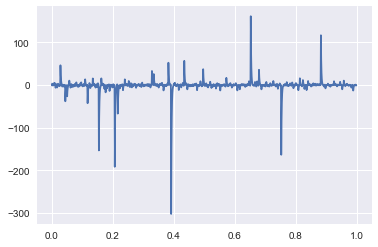

In [18]:
import numpy as np
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import copy

def homotopy(f,x0,N,error):
    f0 = f.evalf(subs={x:x0})
    x_old = copy.copy(x0)
    x_new = copy.copy(x0)
    diff_func = sp.diff(f,x)
    x_t = {'t':[],'x':[]}
    for i in range(1,N):
        x_old = copy.copy(x_new)
        inverse = 1/diff_func.evalf(subs={x:x_old})
        x_new = x_old-inverse*(f.evalf(subs={x:x_old})-(i/N-1)*f.evalf(subs={x:x0}))
        x_t['t'].append(i/N)
        x_t['x'].append(x_new)
    return x_t
    while np.abs((x_old-x_new))>error:
        print(x_new)
        x_old = copy.copy(x_new)
        inverse = 1/diff_func.evalf(subs={x:x_old})
        x_new = x_old - inverse*f.evalf(subs={x:x_old})
    return x_new

x0=1

x = sp.Symbol('x')

f = x**2+x+1

x_t = homotopy(f,x0,1000,1e-4)
sns.set()
plt.plot(x_t['t'],x_t['x'])
plt.show()


17.若同伦(5.4)及解方程组的牛顿法，给出数值延拓法的计算公式。

18.若同伦采用(5.4)，解常微分方程用二阶龙格-库塔法$y_{n+1}=y_n+\frac{h}{2}[f(x_n,y_n)+f(x_n+h,y_n+hf(x_n,y_n))]$，试写出参数微分法解$F(x)=0$的计算公式。

19.根据无约束最优化问题的必要条件和充分条件，求解下列问题

(a)$\min f(x)=2 x_{1}^{2}-2 x_1 x_{2}+x_{2}^{2}+2 x_{1}-2 x_{2}$

(b)$\min f(x)=2 x_{1}^{3}-3 x_{1}^{2}-6 x_{1} x_{2}\left(x_{1}-x_{2}-1\right)$

In [5]:
import sympy as sp

x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')

f = 2*x1**2-2*x1*x2+x2**2+2*x1-2*x2
g = 2*x1**3-3*x1**2-6*x1*x2*(x1-x2-1)

def diff(f):
    diffx1 = sp.diff(f,x1)
    diffx2 = sp.diff(f,x2)
    diff1 = [diffx1,diffx2]
    diffx11 = sp.diff(diffx1,x1)
    diffx12 = sp.diff(diffx1,x2)
    diffx22 = sp.diff(diffx2,x2)
    diff2 = [[diffx11,diffx12],[diffx12,diffx22]]
    return diff1,diff2

f1,f2 = diff(f)
g1,g2 = diff(g)
sp.pprint(f1)
sp.pprint(f2)
sp.pprint(g1)
sp.pprint(g2)

[4⋅x₁ - 2⋅x₂ + 2, -2⋅x₁ + 2⋅x₂ - 2]
[[4, -2], [-2, 2]]
⎡    2                                                                    ⎤
⎣6⋅x₁  - 6⋅x₁⋅x₂ - 6⋅x₁ - 6⋅x₂⋅(x₁ - x₂ - 1), 6⋅x₁⋅x₂ - 6⋅x₁⋅(x₁ - x₂ - 1)⎦
[[12⋅x₁ - 12⋅x₂ - 6, -12⋅x₁ + 12⋅x₂ + 6], [-12⋅x₁ + 12⋅x₂ + 6, 12⋅x₁]]


20.考虑无约束最优化问题
$$\min f(x)=2 x_1^{2}-2 x_{1} x_{2}+x_{2}^{2}+2 x_{1}-2 x_{2}$$
取初始点$x^{(1)}=(0,0)^T$，用算法2求点列$\{x^k\}$，试验证
$$x^{(2 m+1)}=\left( 0,1-\frac{1}{5^{m}}\right)^{T}, m=0,1, \cdots$$
$$x^{(2 m)}=\left(-\frac{2}{5^{m}}, 1-\frac{3}{5^{m}}\right)^{T}, m=1,2, \cdots$$

In [11]:
import numpy as np
import sympy as sp

def descent(f,x0):
    k = 0
    g1 = sp.diff(f,x1)
    g2 = sp.diff(f,x2)
    g1v = g1.evalf(subs={x1:x0[0],x2:x0[1]})
    g2v = g2.evalf(subs={x1:x0[0],x2:x0[1]})
    gk = [g1v,g2v]
    #print(gk)
    while abs(gk[0])>1e-5 or abs(gk[1])>1e-5:
        pk = -gk
        pass
        newf = f.evalf(subs={x1:xk+la*pk[0],x2:xk+la*pk[1]})
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
la = sp.Symbol('la')
x0=np.array([[0],[0]])
f = 2*x1**2-2*x1*x2+x2**2+2*x1-2*x2
descent(f,x0)

[2.00000000000000, -2.00000000000000]


21.用算法3求上题的解，精度要求$\epsilon=10^{-3}$

22.用BFGS算法求29题的解，精度要求$\varepsilon=10^{-5}$

23.设非线性最小二乘问题的数学模型为
$$f\left(t, x\right)=\frac{x_{1} x_{2} t_{1}}{1+x_{1} t_{1}+x_{2} t_{2}}$$
用它拟合下列实验数据

| $t_1$ 	| 1.0   	| 2.0   	| 1.0   	| 2.0   	| 0.1   	|
|-------	|-------	|-------	|-------	|-------	|-------	|
| $t_2$ 	| 1.0   	| 1.0   	| 2.0   	| 2.0   	| 0.0   	|
| $f$   	| 0.126 	| 0.213 	| 0.076 	| 0.126 	| 0.185 	|

试列出对应最小二乘方法的法方程，并用阻尼最小二乘法求问题的解，精度要求$\varepsilon=10^{-2}$